<a href="https://colab.research.google.com/github/dinithprimal/TensorFlow_HandsOn/blob/main/Ex09_Tensorflow_2x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning

## Q-Learning Example

In [2]:
import gym  # all you have to do to import and use open ai gym!

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
env = gym.make('FrozenLake-v1')  # we are going to use the FrozenLake environment

In [4]:
print(env.observation_space.n)  # get number of states
print(env.action_space.n)  # get number of actions

16
4


In [5]:
env.reset()  # reset environment to default state

0

In [6]:
action = env.action_space.sample()  # get a random action

In [7]:
observation, reward, done, info = env.step(action)  # take action, notice it returns

In [8]:
env.render()  # render the GUI for the environment

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


## Frozen Lake Environment

### Building the Q Table

In [9]:
"""
import numpy as np
import time

STATES = env.observation_space.n
ACTIONS = env.action_space.n
"""

'\nimport numpy as np\nimport time\n\nSTATES = env.observation_space.n\nACTIONS = env.action_space.n\n'

In [10]:
"""
Q = np.zeros((STATES, ACTIONS)) # Create a matrix with all 0 values
Q
"""

'\nQ = np.zeros((STATES, ACTIONS)) # Create a matrix with all 0 values\nQ\n'

### Constants

In [11]:
"""
EPISODES = 10000  # How many times to run the environment from the begining
MAX_STEPS = 100  # Max number of steps allowed for each run of environment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96
"""

'\nEPISODES = 10000  # How many times to run the environment from the begining\nMAX_STEPS = 100  # Max number of steps allowed for each run of environment\n\nLEARNING_RATE = 0.81  # learning rate\nGAMMA = 0.96\n'

### Picking an Action

In [12]:
"""
epsilon = 0.9  # Start with a 90% chance of picking a rendom action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a rendomly selected value is less than epsilon
  action = env.action_space.sample()  # take random action
else:
  action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

"""

'\nepsilon = 0.9  # Start with a 90% chance of picking a rendom action\n\n# code to pick action\nif np.random.uniform(0, 1) < epsilon:  # we will check if a rendomly selected value is less than epsilon\n  action = env.action_space.sample()  # take random action\nelse:\n  action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values\n\n'

In [13]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500  # how many times to run the environmetn from the begining
MAX_STEPS = 100  # Max number of steps allowed for each run of environment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False  # If you want to see tarining set to True

epsilon = 0.9

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [14]:
rewards = []

for episode in range(EPISODES):

  state = env.reset()

  for _ in range(MAX_STEPS):
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()

    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[1.69464595e-01 3.05866216e-02 3.30429908e-02 3.27646096e-02]
 [5.82447799e-03 3.85869639e-03 1.27643889e-02 2.56458984e-01]
 [7.66184596e-03 5.02579349e-03 5.50326797e-03 1.32266763e-01]
 [4.32320850e-03 4.42126428e-03 7.39424838e-04 8.07039872e-02]
 [2.37116646e-01 1.01570484e-02 2.17250424e-02 6.88101932e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.41783588e-01 1.05409872e-04 4.47544337e-05 8.92809850e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.05571628e-02 1.09074733e-02 7.53258463e-03 3.96663495e-01]
 [1.22121358e-02 4.00060468e-01 7.95523898e-03 9.69018051e-03]
 [2.52270904e-01 4.95897557e-03 5.41380172e-03 1.98772624e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.92847440e-02 5.23674697e-02 7.89198138e-01 4.42080747e-02]
 [2.08381860e-01 9.84079702e-01 1.33222750e-01 1.82090138e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

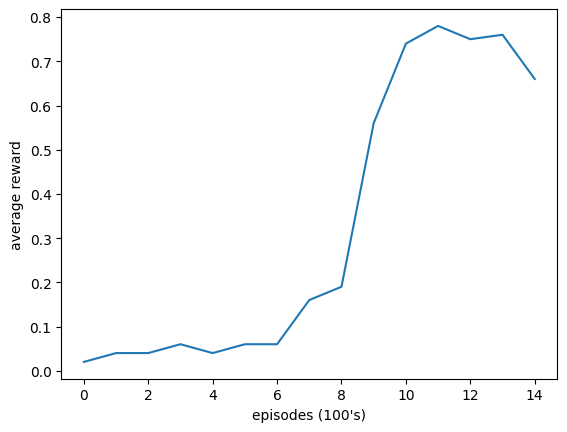

In [16]:
# We can plot the training progress and see how the agent improved

import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []

for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()